# Optimization Project 2

### Sai Bhargav, Praneet Kumar, Anthony Moreno, Joe Morris

#### Necessary Imports

In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime

## Helpful for Grading:

### TIME LIMIT FOR GUROBI

In [2]:
time = 10

### M LIST 

##### We check later on in the code to make sure these values are within range of the dataset

In [3]:
m_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

### DATASETS

In [4]:
# FIRST DATASET (2019 GIVEN)
df_19 = pd.read_csv("stocks2019.csv")

# SECOND DATASET (2020 GIVEN)
df_20 = pd.read_csv("stocks2020.csv")

### Graph Styling

In [5]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2


## Import the Data

In [6]:
# Manipulate the 2019 prices data
df_19.rename(columns={df_19.columns[0] : 'X'}, inplace=True)
df_19['X'] = pd.to_datetime(df_19['X'])
df_19.set_index('X', inplace=True)
stock_list = list(df_19.columns.values[1:])
df_19.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970


### This helps calculate returns in a future step

#### Creating another dataframe with the first row(or timeperiod prices) excluded this database will act as final prices of the stocks in the equation:

In [7]:
df_19_final = df_19.iloc[1:].copy()
df_19_final.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,185.824142,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715


### This helps calculate returns in a future step

#### Creating another database with the last row(or timeperiod prices) excluded and then changing the index values to the ones in the dataframe df_19_final so that we can directly apply math operations on each of the values from both databases this database will act as initial prices of the stocks in the equation:

In [8]:
df_19_initial = df_19.iloc[:-1].copy()
df_19_initial.index = df_19_final.index
df_19_initial.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
2019-01-04,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970


### Dataframe for Returns

In [9]:
df_19_returns = (df_19_final - df_19_initial)/df_19_initial
df_19_returns.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.033602,-0.035509,-0.039498,-0.09453,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.044824,0.039903,0.048632,0.11437,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303


### Correlation Matrix

#### Using the corr() method to get the correlation of the returns of the stocks after excluding the 'NDX'(index) returns so that we get the correlation of each combination of the stocks 

In [10]:
corr_19 = df_19_returns.iloc[:,1:].corr().to_numpy()
print(corr_19)

[[ 1.          0.39993857  0.36537639 ...  0.30307745  0.04338924
   0.24966667]
 [ 0.39993857  1.          0.45284767 ...  0.3615157   0.20740316
   0.28949742]
 [ 0.36537639  0.45284767  1.         ...  0.43889211  0.01728295
   0.47801032]
 ...
 [ 0.30307745  0.3615157   0.43889211 ...  1.         -0.07611537
   0.516958  ]
 [ 0.04338924  0.20740316  0.01728295 ... -0.07611537  1.
  -0.11755175]
 [ 0.24966667  0.28949742  0.47801032 ...  0.516958   -0.11755175
   1.        ]]


### Read in the 2020 prices data

In [11]:
df_20.rename(columns={df_20.columns[0] : 'X'}, inplace=True)
df_20['X'] = pd.to_datetime(df_20['X'])
df_20.set_index('X', inplace=True)
df_20.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-02,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,235.229111,...,36.970001,254.550003,196.729996,150.376770,219.449997,57.253372,167.460007,64.771545,61.184597,100.399811
2020-01-03,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,233.632172,...,36.180000,250.169998,200.880005,151.839554,217.979996,57.253372,168.440002,63.774597,61.478848,98.088585


### Shift data for calculating returns (same as above)

In [12]:
df_20_final = df_20.iloc[1:].copy()
df_20_final.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-03,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,233.632172,...,36.180000,250.169998,200.880005,151.839554,217.979996,57.253372,168.440002,63.774597,61.478848,98.088585
2020-01-06,8848.519531,59.349670,333.709991,48.389999,106.580002,285.880005,1397.810059,1394.209961,1902.880005,235.425064,...,35.689999,250.949997,202.740005,152.187836,224.029999,57.747601,169.490005,62.550629,61.390568,96.044044


### Shift data for calculating returns (same as above)

In [13]:
df_20_initial = df_20.iloc[:-1].copy()
df_20_initial.index = df_20_final.index
df_20_initial.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-03,8872.219727,58.266792,334.429993,49.099998,107.839996,283.679993,1368.680054,1367.369995,1898.010010,235.229111,...,36.970001,254.550003,196.729996,150.376770,219.449997,57.253372,167.460007,64.771545,61.184597,100.399811
2020-01-06,8793.900391,58.286655,331.809998,48.599998,106.410004,280.440002,1361.520020,1360.660034,1874.969971,233.632172,...,36.180000,250.169998,200.880005,151.839554,217.979996,57.253372,168.440002,63.774597,61.478848,98.088585


### Create returns dataframe for 2020

In [14]:
df_20_returns = (df_20_final - df_20_initial)/df_20_initial
df_20_returns.head(2)

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009727,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
2020-01-06,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844


## Binary Integer Programming to find which stocks best represent the index

In [15]:
num = corr_19.shape[0] # storing the number of stocks in the index
obj = corr_19.flatten() # the correlation matrix is a 2-D array. For the Integer Optimisation we are going to do we 
# need it as a 1-D array. So using flatten() method to achieve that

#obj now has num*num elements each element number(i*j)representing the returns correlation
#between stock i and stock j

obj = np.concatenate((obj, np.zeros(num))) # the number of variables in our model = 
#number of possible mappings for each of the stocks(x_ij)+number of possible stocks for our portfolio(y_j) = 
# num + num*num 

### For m = 5

##### Make sure m=5 works even when number of stocks is less than 5
##### If number of stocks is less than 5, we automatically use number of stocks as m for m = 5

In [16]:
length = 5
if num < 5 :
    length = num

##### OBJ Vector

In [17]:
print(obj)

[1.         0.39993857 0.36537639 ... 0.         0.         0.        ]


#### Building constraints

In [18]:
A = np.zeros((1+num+num*num,num*num+num))
A[0,:] = np.array([0]*(num*num) + [1] * num)
for i in range(num):
    A[i+1,i*num:(i+1)*num] = 1
for j in range(num):
    A[(j+1)*num+1:(j+2)*num+1,num*num:num*num+num] = np.identity(num)*-1
        
A[num+1:1+num+num*num,0:num*num] = np.identity(num*num)

b = np.zeros(1+num+num*num)
b[0] = length
b[1:num+1] = 1
b[num+1:] = 0
sense = np.array(['=']*(num+1)+['<']*(num*num))
vtype = np.array(['B']*(num*num+num))

##### A Matrix

In [19]:
print(A)

[[ 0.  0.  0. ...  1.  1.  1.]
 [ 1.  1.  1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1. -0. -0.]
 [ 0.  0.  0. ... -0. -1. -0.]
 [ 0.  0.  0. ... -0. -0. -1.]]


##### b Vector

In [20]:
print(b)

[5. 1. 1. ... 0. 0. 0.]


##### sense Vector

In [21]:
print(sense)

['=' '=' '=' ... '<' '<' '<']


##### Run the model to find stock selection

In [22]:
stockModel = gp.Model() # initialize an empty model
stockModX = stockModel.addMVar(num*num+num, vtype = vtype)
stockModCon = stockModel.addMConstrs(A, stockModX, sense, b) # add the constraints to the model
stockModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
stockModel.Params.OutputFlag = 0 
stockModel.Params.TimeLimit = 3600
stockModel.optimize() # solve the LP

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-18


##### Stocks to be selected for our portfolio

In [23]:
print(stockModX.X[num*num:])

[-0. -0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0. -0.  0.  0.
 -0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0.  0.
 -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0.  0.  1. -0. -0.  1. -0. -0. -0.  1. -0. -0.  0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0. -0.  1. -0. -0. -0.  1. -0.]


##### Printing the stocks to be selected for the portfolio 

In [24]:
stocks = list(np.where(stockModX.X[num*num:] == 1)[0])
df_stocks = pd.DataFrame(df_19_returns.columns[1:][stocks], columns = ['Stocks'])
df_stocks

,Stocks
0,LBTYK
1,MXIM
2,MSFT
3,VRTX
4,XEL


## Linear Programming to find the weights of the stocks selected

In [25]:
times = len(df_19_returns)
index_r = df_19_returns.iloc[:, 0].values
weight_con = stockModX.X[num*num:]

##### Returns dataframe as a matrix

In [26]:
port_r = df_19_returns.iloc[:,1:].values
print(port_r)

[[-0.03550922 -0.03949775 -0.09453006 ... -0.0682175  -0.00394022
  -0.03765113]
 [ 0.039903    0.04863238  0.11436957 ...  0.04235632  0.00978569
   0.04630285]
 [ 0.02819594  0.01357263  0.08263158 ...  0.03552204 -0.00432994
   0.02641526]
 ...
 [ 0.00136029  0.00473243  0.00193382 ...  0.00915956 -0.00111356
   0.0019291 ]
 [ 0.00509428 -0.00123793 -0.00965046 ... -0.01066874  0.00525556
  -0.00263481]
 [-0.00523733 -0.00740655 -0.0142919  ...  0.00402381  0.00269325
  -0.0075187 ]]


##### Building constraints

In [27]:
A_2 = np.zeros((1+times*2,num+times))
A_2[0,times:] = 1
for i in range(times):
    A_2[i+1,i] = 1
    A_2[i+1,times:] = port_r[i]
    A_2[i+1+times,i] = 1
    A_2[i+1+times,times:] = -1*port_r[i]
    
b_2 = np.concatenate((np.array([1]),index_r,-1*index_r))
sense_2 = np.array(['='] + ['>']*2*times)
obj_2 = np.array([1]*times + [0]*num)
ub = np.concatenate((np.array([np.inf]*times),weight_con))

##### Run Gurobi to optimize weights

In [28]:
weightsModel = gp.Model() # initialize an empty model
weightModX = weightsModel.addMVar(num+times, ub = ub)
weightModCon = weightsModel.addMConstrs(A_2, weightModX, sense_2, b_2) # add the constraints to the model
weightsModel.setMObjective(None,obj_2,0)#,sense=gp.GRB.MAXIMIZE)
weightsModel.Params.OutputFlag = 0 
weightsModel.Params.TimeLimit = 3600
weightsModel.optimize() # solve the LP

##### Print weights for m = 5 stocks

In [29]:
portfolio_19_weights = weightModX.x[times:]# weights of the stocks we previously selected
weights = list(portfolio_19_weights[np.where(portfolio_19_weights > 0)[0]])
df_stocks['weights'] = weights
#portfolio_19_weights
df_stocks.set_index('Stocks')

,weights
Stocks,
LBTYK,0.048862
MXIM,0.210388
MSFT,0.580352
VRTX,0.071190
XEL,0.089208


##### Find sum of absolute difference

In [30]:
index_returns_20 = df_20_returns.iloc[:,0].to_numpy()
stock_returns_20 = df_20_returns.iloc[:,1:].T.to_numpy()
portfolio_returns_20 = portfolio_19_weights @ stock_returns_20
np.absolute(index_returns_20 - portfolio_returns_20).sum()

0.8696699433741916

#### Check if m_list is within the range of number of stocks

In [31]:
try:
    if max(m_list) > num :
        m_list = []
        for i in range(10, num, 10) :
            m_list.append(i) 
        if m_list[-1] != num :
            m_list.append(num)
except :
    m_list = [num]

## Run the IP and LP for all m values

In [32]:
stock_returns_19 = df_19_returns.iloc[:,1:].T.to_numpy()
index_returns_19 = df_19_returns.iloc[:,0].to_numpy()

returns_19 = []
returns_20 = []
eval_19 = []
eval_20 = []
weights = []

b_m = b.copy()

display_df = pd.DataFrame(columns=['m', '2019 Cumulative Portfolio Returns', '2019 Total Absolute Deviation', \
    '2020 Cumulative Portfolio Returns', '2020 Total Absolute Deviation'])

for m in m_list:
    # make sure m is within our datasets range
    if m <= num :
        # if m is the same as choosing all the stocks we do not have to do stock selection
        if m == num:

            # calculate the weights
            weight_con_m = np.ones(num)
            ub = np.concatenate((np.array([np.inf]*times),weight_con_m)) 
            weightModel_2m = gp.Model() # initialize an empty model
            weightModX_2m = weightModel_2m.addMVar(num+times, ub = ub)
            weightModCon_2m = weightModel_2m.addMConstrs(A_2, weightModX, sense_2, b_2) # add the constraints to the model
            weightModel_2m.setMObjective(None,obj_2,0)
            weightModel_2m.Params.OutputFlag = 0 
            weightModel_2m.Params.TimeLimit = 3600
            weightModel_2m.optimize() # solve the LP
            
            portfolio_19_weights_m = weightModX_2m.x[times:]
            weights.append(portfolio_19_weights_m)
            
            portfolio_returns_19_m = portfolio_19_weights_m @ stock_returns_19
            portfolio_returns_20_m = portfolio_19_weights_m @ stock_returns_20
            cum_return_19_m = (1 + portfolio_returns_19_m).cumprod() - 1
            cum_return_20_m = (1 + portfolio_returns_20_m).cumprod() - 1
            port_20_eval = np.absolute(index_returns_20 - portfolio_returns_20_m).sum()
            eval_19.append(weightModel_2m.ObjVal)
            eval_20.append(port_20_eval)
            returns_19.append(cum_return_19_m[-1])
            returns_20.append(cum_return_20_m[-1])
            display_df.loc[len(display_df)] = [m, cum_return_19_m[-1], weightModel_2m.ObjVal, cum_return_20_m[-1], port_20_eval]
            
        else:
            b_m[0] = m
            
            # select the stocks
            stockModel_m = gp.Model() # initialize an empty model
            stockModX_m = stockModel_m.addMVar(num*num+num, vtype = vtype)
            stockModCon_m = stockModel_m.addMConstrs(A, stockModX_m, sense, b_m) # add the constraints to the model
            stockModel_m.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
            stockModel_m.Params.OutputFlag = 0 
            stockModel_m.Params.TimeLimit = 3600
            stockModel_m.optimize() # solve the LP
            
            # calculate the weights
            weight_con_m = stockModX_m.X[num*num:]
            ub = np.concatenate((np.array([np.inf]*times),weight_con_m)) 
            weightModel_2m = gp.Model() # initialize an empty model
            weightModX_2m = weightModel_2m.addMVar(num+times, ub = ub)
            weightModCon_2m = weightModel_2m.addMConstrs(A_2, weightModX_2m, sense_2, b_2) # add the constraints to the model
            weightModel_2m.setMObjective(None,obj_2,0)#,sense=gp.GRB.MAXIMIZE)
            weightModel_2m.Params.OutputFlag = 0 
            weightModel_2m.Params.TimeLimit = 3600
            weightModel_2m.optimize() # solve the LP
            
            portfolio_19_weights_m = weightModX_2m.x[times:]
            weights.append(portfolio_19_weights_m)
            
            portfolio_returns_19_m = portfolio_19_weights_m @ stock_returns_19
            portfolio_returns_20_m = portfolio_19_weights_m @ stock_returns_20
            cum_return_19_m = (1 + portfolio_returns_19_m).cumprod() - 1
            cum_return_20_m = (1 + portfolio_returns_20_m).cumprod() - 1
            port_20_eval = np.absolute(index_returns_20 - portfolio_returns_20_m).sum()
            eval_19.append(weightModel_2m.ObjVal)
            eval_20.append(port_20_eval)
            returns_19.append(cum_return_19_m[-1])
            returns_20.append(cum_return_20_m[-1])
            display_df.loc[len(display_df)] = [m, cum_return_19_m[-1], weightModel_2m.ObjVal, cum_return_20_m[-1], port_20_eval]

display_df.set_index('m', inplace=True)
display_df.style.format({
    '2019 Cumulative Portfolio Returns': '{:,.2%}'.format,
    '2019 Total Absolute Deviation': '{:,.4f}'.format,
    '2020 Cumulative Portfolio Returns': '{:,.2%}'.format,
    '2020 Total Absolute Deviation': '{:,.4f}'.format,
})

,2019 Cumulative Portfolio Returns,2019 Total Absolute Deviation,2020 Cumulative Portfolio Returns,2020 Total Absolute Deviation
m,,,,
10.0,42.40%,0.7012,20.83%,0.8389
20.0,40.88%,0.4737,20.96%,0.6826
30.0,43.12%,0.4180,30.11%,0.5491
40.0,38.27%,0.3705,29.30%,0.5873
50.0,41.53%,0.3325,28.79%,0.5811
60.0,36.92%,0.3449,18.35%,0.8194
70.0,46.12%,0.1698,24.66%,0.4025
80.0,43.80%,0.1477,22.46%,0.3864
90.0,40.62%,0.0538,27.18%,0.2476


In [33]:
df_m = pd.DataFrame(weights)
df_m.columns = stock_list
df_m.insert(0,'No.of Stocks in Portfolio',m_list)
df_m['2019 Returns'] = returns_19
df_m['2020 Returns'] = returns_20
df_m['2019 Sum of abs(Index - Portfolio returns) over timeperiods'] = eval_19
df_m['2020 Sum of abs(Index - Portfolio returns) over timeperiods'] = eval_20

df_m

,No.of Stocks in Portfolio,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,VRTX,WBA,WDAY,WDC,XEL,XLNX,2019 Returns,2020 Returns,2019 Sum of abs(Index - Portfolio returns) over timeperiods,2020 Sum of abs(Index - Portfolio returns) over timeperiods
0,10,0.044200,0.000000,0.000000,0.000000,0.024996,0.000000,0.000000,0.000000,0.000000,...,0.046216,0.000000,0.000000,0.000000,0.062695,0.000000,0.423984,0.208301,0.701218,0.838888
1,20,0.017393,0.000000,0.000000,0.000000,0.021534,0.186001,0.000000,0.000000,0.000000,...,0.023118,0.000000,0.000000,0.000000,0.038851,0.000000,0.408796,0.209590,0.473736,0.682573
2,30,0.016890,0.031105,0.000000,0.000000,0.000000,0.180634,0.000000,0.000000,0.000000,...,0.036662,0.000000,0.000000,0.000000,0.014280,0.000000,0.431176,0.301145,0.418015,0.549085
3,40,0.028893,0.029164,0.000000,0.000000,0.006209,0.134783,0.000000,0.000000,0.045918,...,0.006937,0.008547,0.000000,0.000000,0.003326,0.000000,0.382654,0.292968,0.370517,0.587312
4,50,0.019456,0.034341,0.000000,0.007062,0.007861,0.129515,0.000000,0.000000,0.030491,...,0.000693,0.001420,0.000000,0.000000,0.000000,0.000000,0.415273,0.287943,0.332540,0.581148
5,60,0.015340,0.050870,0.016311,0.000000,0.011734,0.157275,0.000000,0.000000,0.012698,...,0.000000,0.002394,0.000000,0.000000,0.000000,0.000000,0.369201,0.183519,0.344890,0.819424
6,70,0.011191,0.000000,0.007895,0.000000,0.004782,0.000000,0.086935,0.000000,0.015538,...,0.005219,0.011086,0.000957,0.000000,0.000000,0.000000,0.461226,0.246624,0.169824,0.402497
7,80,0.008611,0.000000,0.006453,0.001588,0.008199,0.096784,0.000000,0.000000,0.015357,...,0.007505,0.009550,0.000251,0.000000,0.000000,0.016468,0.437979,0.224610,0.147683,0.386431
8,90,0.003441,0.020015,0.004609,0.003648,0.000023,0.000000,0.084184,0.094433,0.014169,...,0.006090,0.008059,0.001399,0.002064,0.007810,0.007687,0.406154,0.271778,0.053779,0.247582
9,100,0.004223,0.017140,0.004037,0.002450,0.000000,0.056829,0.029717,0.095613,0.013637,...,0.008832,0.009131,0.002556,0.000000,0.003662,0.005442,0.400651,0.267112,0.044911,0.249943


#### Cumulative Returns for each value of m

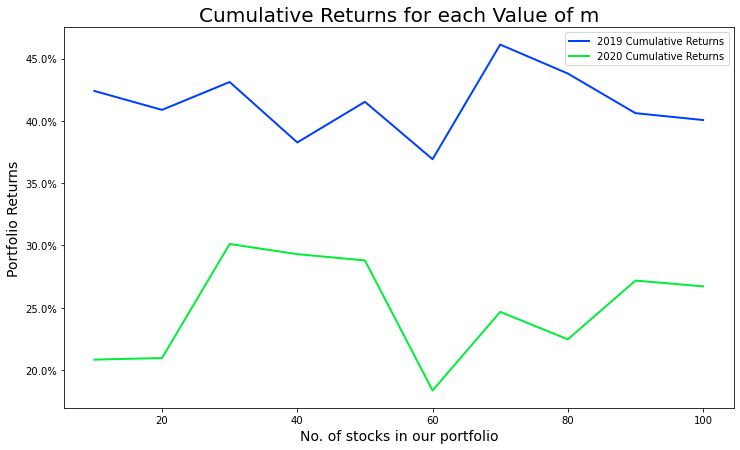

In [34]:
plt.plot(m_list,returns_19)
plt.plot(m_list,returns_20)
plt.title('Cumulative Returns for each Value of m')
plt.legend(['2019 Cumulative Returns','2020 Cumulative Returns'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('No. of stocks in our portfolio')
plt.ylabel('Portfolio Returns')
plt.show()

#### Total Absolute Deviation for each value of m

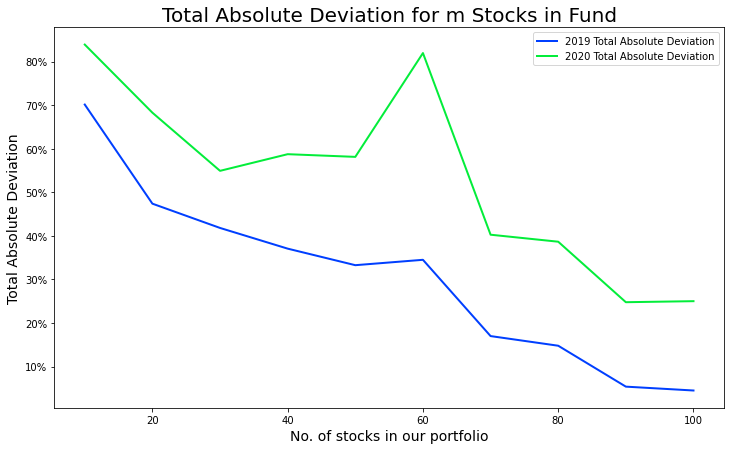

In [35]:
plt.plot(m_list,eval_19)
plt.plot(m_list,eval_20)
plt.legend(['2019 Total Absolute Deviation','2020 Total Absolute Deviation'])
plt.title('Total Absolute Deviation for m Stocks in Fund')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('No. of stocks in our portfolio')
plt.ylabel('Total Absolute Deviation')
plt.show()

For m=30 we are getting the highest out-of-sample returns. If we increase the number of stocks in our portfolio the 2020 returns are diminishing.

#### IP LP 2020 Cumulative Returns over Time

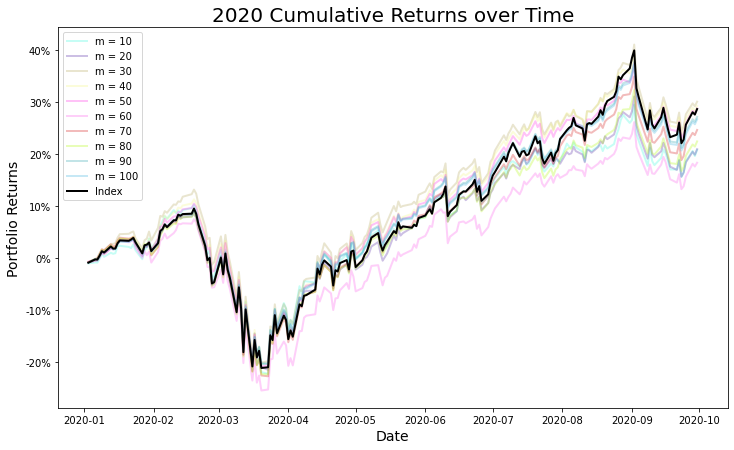

In [36]:
for index, m in enumerate(df_m['No.of Stocks in Portfolio']) :
    weights = df_m.iloc[index][1:-4]
    returns_20_cum_ret = ((1 + (weights @ stock_returns_20)).cumprod() - 1)
    plt.plot(df_20_returns.index,returns_20_cum_ret, label='m = ' + str(m), alpha = 0.3, color=np.random.rand(3,))

plt.plot(df_20_returns.index, ((1 + df_20.iloc[:, :1].pct_change().dropna()).cumprod() - 1), color="black", label = 'Index')
plt.title('2020 Cumulative Returns over Time')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.show()

## MIP to find the stocks and weights

#### Construct Constraints

In [37]:
M=1 # Big M is 1. Weights cannot and do not have to be greater than 1
A_3 = np.zeros((1+times*2+num+1,2*num+times))
A_3[0,times:times+num] = 1 # weights sum = 1
for i in range(times):
    A_3[i+1,i] = 1
    A_3[i+1,times:times+num] = port_r[i]
    A_3[i+1+times,i] = 1
    A_3[i+1+times,times:times+num] = -1*port_r[i]
    
for i in range(num):
    A_3[2*times+1+i,times+i] = 1
    A_3[2*times+1+i,num+times+i] = -1*M

A_3[1+times*2+num,times+num:] = 1 # no. of stocks in our portfolio constraint
    
b_3 = np.concatenate((np.array([1]),index_r,-1*index_r,np.zeros(num),np.array([0])))
b_3[1+times*2+num] = length
sense_3 = np.array(['='] + ['>']*2*times + ['<']*num + ['='])
obj_3 = np.array([1]*times + [0]*num*2)
#ub = np.concatenate((np.array([np.inf]*times),weight_con))
vtype_3 = np.array(['C']*(times+num) + ['B']*num)

### Run MIP for m = 5, but check if file exists first

In [38]:
import os

isExist = os.path.exists('Optimisation_Q4m=5.xlsx')

if isExist == False:
    
    mipModel = gp.Model() # initialize an empty model
    mipModX = mipModel.addMVar(2*num+times, vtype = vtype_3)
    mipModCon = mipModel.addMConstrs(A_3, mipModX, sense_3, b_3) # add the constraints to the model
    mipModel.setMObjective(None,obj_3,0)#,sense=gp.GRB.MAXIMIZE)
    mipModel.Params.OutputFlag = 0 
    mipModel.Params.TimeLimit = time
    mipModel.optimize() # solve the LP

    portfolio_19_weights_3 = mipModX.x[times:times+num]
    
    df_3 = pd.DataFrame(columns =stock_list) 
    df_3.loc[0] = portfolio_19_weights_3
    df_3.insert(0,'No.of Stocks in Portfolio',length)
    portfolio_returns_20_3 = (portfolio_19_weights_3 @ stock_returns_20)
    portfolio_returns_19_3 = (portfolio_19_weights_3 @ stock_returns_19)
    df_3['2019 Returns'] = ((1 + portfolio_returns_19_3).cumprod() - 1)[-1]
    df_3['2020 Returns'] = ((1 + portfolio_returns_20_3).cumprod() - 1)[-1]
    df_3['2019 Sum of abs(Index - Portfolio returns) over timeperiods'] = mipModel.ObjVal
    df_3['2020 Sum of abs(Index - Portfolio returns) over timeperiods'] = \
    np.absolute(index_returns_20 - portfolio_returns_20_3).sum()

    display(df_3)
    #df_3.to_excel('Optimisation_Q4m=5.xlsx') # use this to save the results to an excel file
    
else:
    df_3 = pd.read_excel('Optimisation_Q4m=5.xlsx', index_col = 0)
    display(df_3)

,No.of Stocks in Portfolio,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,VRTX,WBA,WDAY,WDC,XEL,XLNX,2019 Returns,2020 Returns,2019 Sum of abs(Index - Portfolio returns) over timeperiods,2020 Sum of abs(Index - Portfolio returns) over timeperiods
0,5,0,0,0,0,0,0,0,0.250123,0,...,0,0,0,0,0,0,0.416459,0.381376,0.499259,0.591398


#### Weights for m = 5

In [39]:
df_stocks_3 = df_3.iloc[:,1:-4].T
df_stocks_3 = df_stocks_3[df_stocks_3>0].dropna().rename({0:'Weights'}, axis = 1)
df_stocks_3

,Weights
AMZN,0.250123
ADI,0.113758
AAPL,0.191692
MSFT,0.289869
MDLZ,0.154558


#### Total Absolute Deviation for m = 5

In [40]:
df_3['2020 Sum of abs(Index - Portfolio returns) over timeperiods'].iloc[0]

0.5913979244173757

## MIP for all values of m provided

In [41]:
isExist = os.path.exists('Optimisation_4.xlsx')

if isExist == False:
    
    returns_19_3 = []
    returns_20_3 = []
    weights_3m = []
    eval_19_3m = []
    eval_20_3m = []

    b_3m = b_3.copy()
    for m in m_list:
        b_3m[1+times*2+num] = m
        mipModel_3m = gp.Model() # initialize an empty model
        mipModX_3m = mipModel_3m.addMVar(2*num+times, vtype = vtype_3)
        mipModCon_3m = mipModel_3m.addMConstrs(A_3, mipModX_3m, sense_3, b_3m) # add the constraints to the model
        mipModel_3m.setMObjective(None,obj_3,0)#,sense=gp.GRB.MAXIMIZE)
        mipModel_3m.Params.OutputFlag = 0 
        mipModel_3m.Params.TimeLimit = time
        mipModel_3m.optimize() # solve the LP

        portfolio_19_weights_3m = mipModX_3m.x[times:times+num]
        weights_3m.append(portfolio_19_weights_3m)

        portfolio_returns_19_3m = portfolio_19_weights_3m @ stock_returns_19
        portfolio_returns_20_3m = portfolio_19_weights_3m @ stock_returns_20
        port_19_eval_3m = np.absolute(index_returns_19 - portfolio_returns_19_3m).sum()
        port_20_eval_3m = np.absolute(index_returns_20 - portfolio_returns_20_3m).sum()
        eval_19_3m.append(port_19_eval_3m)
        eval_20_3m.append(port_20_eval_3m)
        portfolio_returns_19_3m = ((1 + portfolio_returns_19_3m).cumprod() - 1)[-1]
        portfolio_returns_20_3m = ((1 + portfolio_returns_20_3m).cumprod() - 1)[-1]
        returns_19_3.append(portfolio_returns_19_3m)
        returns_20_3.append(portfolio_returns_20_3m)

    df_m3 = pd.DataFrame(weights_3m)
    df_m3.columns = stock_list
    df_m3.insert(0,'No.of Stocks in Portfolio',m_list)
    df_m3['2019 Returns'] = returns_19_3
    df_m3['2020 Returns'] = returns_20_3
    df_m3['2019 Sum of abs(Index - Portfolio returns) over timeperiods'] = eval_19_3m
    df_m3['2020 Sum of abs(Index - Portfolio returns) over timeperiods'] = eval_20_3m

    display(df_m3)
    #df_m3.to_excel('Optimisation_4.xlsx') # use this line to store the results to an excel file
else:
    df_m3 = pd.read_excel('Optimisation_4.xlsx', index_col = 0)
    display(df_m3)

,No.of Stocks in Portfolio,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,VRTX,WBA,WDAY,WDC,XEL,XLNX,2019 Returns,2020 Returns,2019 Sum of abs(Index - Portfolio returns) over timeperiods,2020 Sum of abs(Index - Portfolio returns) over timeperiods
0,10,0.000000,0.000000,0.000000,0.000000,0,0.093503,0.000000,0.125808,0.076823,...,0.000000,0.041476,0.000000,0,0.000000,0.000000,0.355918,0.259300,0.290137,0.548939
1,20,0.000000,0.036546,0.000000,0.000000,0,0.000000,0.089957,0.102526,0.000000,...,0.021293,0.000000,0.000000,0,0.000000,0.000000,0.353639,0.281388,0.161601,0.406139
2,30,0.000000,0.039133,0.000000,0.000000,0,0.000000,0.084246,0.102786,0.000000,...,0.011924,0.013331,0.000000,0,0.000000,0.000000,0.354037,0.272000,0.106465,0.344686
3,40,0.000000,0.031216,0.007328,0.000000,0,0.087186,0.000000,0.103452,0.013469,...,0.016898,0.010774,0.000000,0,0.000000,0.008287,0.351872,0.287862,0.081100,0.294280
4,50,0.005843,0.023262,0.005315,0.005659,0,0.000000,0.083852,0.096601,0.015262,...,0.009889,0.010754,0.000000,0,0.000000,0.004854,0.348571,0.293424,0.062820,0.261847
5,60,0.004068,0.020669,0.004240,0.000000,0,0.085192,0.000000,0.097137,0.012549,...,0.006291,0.007096,0.000000,0,0.000000,0.005190,0.348430,0.294122,0.052008,0.244844
6,70,0.004030,0.014550,0.003091,0.000000,0,0.084941,0.000000,0.096080,0.014331,...,0.008004,0.009340,0.002068,0,0.000000,0.005545,0.351353,0.290100,0.047723,0.257388
7,80,0.003119,0.017845,0.003566,0.001275,0,0.057147,0.027985,0.096184,0.014270,...,0.007782,0.009250,0.002624,0,0.000000,0.005633,0.350226,0.293334,0.045227,0.249143
8,90,0.004223,0.017140,0.004037,0.002450,0,0.056829,0.029717,0.095613,0.013637,...,0.008832,0.009131,0.002556,0,0.003662,0.005442,0.350486,0.294306,0.044911,0.249943
9,100,0.004223,0.017140,0.004037,0.002450,0,0.056829,0.029717,0.095613,0.013637,...,0.008832,0.009131,0.002556,0,0.003662,0.005442,0.350486,0.294306,0.044911,0.249943


#### MIP Total Absolute Deviation for m Stocks

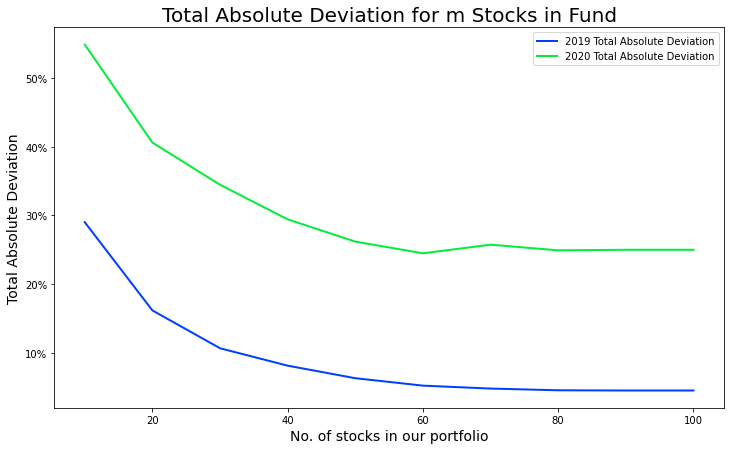

In [42]:
plt.plot(df_m3['No.of Stocks in Portfolio'],df_m3['2019 Sum of abs(Index - Portfolio returns) over timeperiods'])
plt.plot(df_m3['No.of Stocks in Portfolio'],df_m3['2020 Sum of abs(Index - Portfolio returns) over timeperiods'])
plt.legend(['2019 Total Absolute Deviation','2020 Total Absolute Deviation'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Total Absolute Deviation for m Stocks in Fund')
plt.xlabel('No. of stocks in our portfolio')
plt.ylabel('Total Absolute Deviation')
plt.show()

### MIP Cumulative Returns for m Stocks

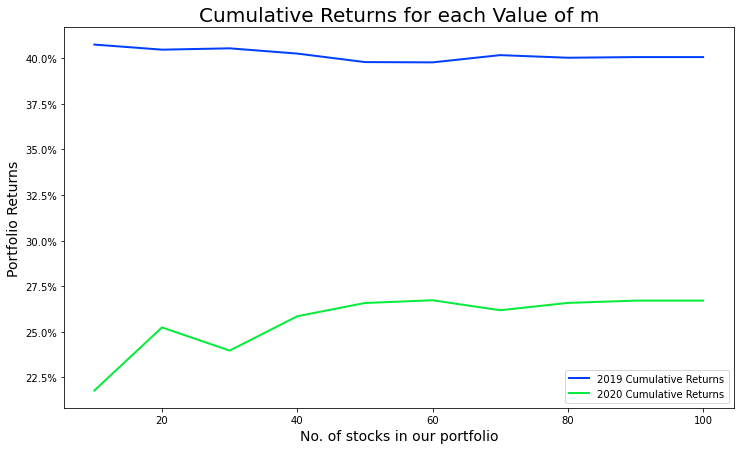

In [43]:
first_returns = []
second_returns = []
for index, m in enumerate(df_m3['No.of Stocks in Portfolio']) :
    weights = df_m3.iloc[index][1:-4]
    returns_19_cum_ret = ((1 + (weights @ stock_returns_19)).cumprod() - 1)[-1]
    returns_20_cum_ret = ((1 + (weights @ stock_returns_20)).cumprod() - 1)[-1]

    first_returns.append(returns_19_cum_ret)
    second_returns.append(returns_20_cum_ret)

plt.plot(df_m3['No.of Stocks in Portfolio'],first_returns)
plt.plot(df_m3['No.of Stocks in Portfolio'],second_returns)
plt.title('Cumulative Returns for each Value of m')
plt.legend(['2019 Cumulative Returns','2020 Cumulative Returns'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('No. of stocks in our portfolio')
plt.ylabel('Portfolio Returns')
plt.show()

#### MIP 2020 Cumulative Returns over Time

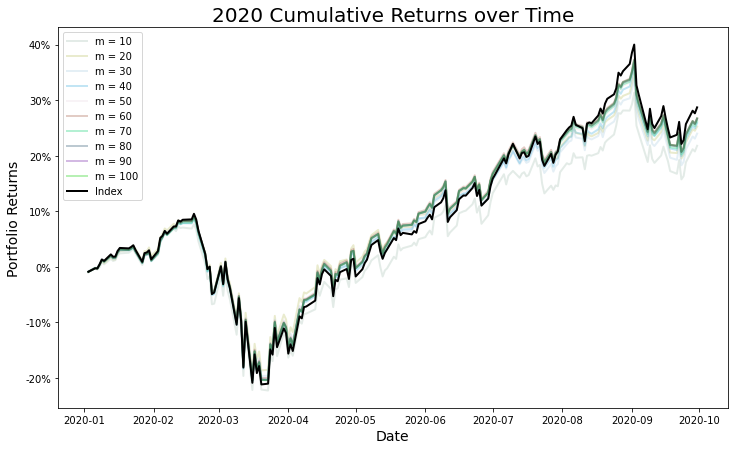

In [44]:
for index, m in enumerate(df_m3['No.of Stocks in Portfolio']) :
    weights = df_m3.iloc[index][1:-4]
    returns_20_cum_ret = ((1 + (weights @ stock_returns_20)).cumprod() - 1)
    plt.plot(df_20_returns.index,returns_20_cum_ret, label='m = ' + str(m), alpha = 0.3, color=np.random.rand(3,))

plt.plot(df_20_returns.index, ((1 + df_20.iloc[:, :1].pct_change().dropna()).cumprod() - 1), color="black", label = 'Index')
plt.title('2020 Cumulative Returns over Time')
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.show()